### Preprocessing
load data 

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import os 
from os.path import join 

In [6]:
abalone_path = join('.','abalone.txt')
column_path = join('.','abalone_attributes.txt') 

In [7]:
print(abalone_path)
print(column_path) 

./abalone.txt
./abalone_attributes.txt


In [20]:
abalone_columns = list()
for line in open(column_path):
  abalone_columns.append(line.strip()) 

print(abalone_columns)

['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']


In [34]:
data = pd.read_csv(abalone_path, header=None, names=abalone_columns) # header정보는 없다. attribute에서 불러오기 때문 
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [35]:
label = data['Sex']
del data['Sex'] 
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [36]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


### Scaling 
MinMax Scaling

In [33]:
# data = (data - np.min(data)) / (np.max(data) - np.min(data)) 
# data 

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286
...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,0.357143
4173,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,0.321429
4174,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,0.285714
4175,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,0.321429


In [38]:
from sklearn.preprocessing import MinMaxScaler 

In [40]:
mmscaler = MinMaxScaler()
# fit()  
mmscaler.fit(data)
# transform 
mScaled_data = mmscaler.transform(data) 
mScaled_data # 결과가 numpy 배열로 나온다.  

array([[0.51351351, 0.5210084 , 0.0840708 , ..., 0.1323239 , 0.14798206,
        0.5       ],
       [0.37162162, 0.35294118, 0.07964602, ..., 0.06319947, 0.06826109,
        0.21428571],
       [0.61486486, 0.61344538, 0.11946903, ..., 0.18564845, 0.2077728 ,
        0.28571429],
       ...,
       [0.70945946, 0.70588235, 0.18141593, ..., 0.37788018, 0.30543099,
        0.28571429],
       [0.74324324, 0.72268908, 0.13274336, ..., 0.34298881, 0.29347285,
        0.32142857],
       [0.85810811, 0.84033613, 0.17256637, ..., 0.49506254, 0.49177877,
        0.39285714]])

In [42]:
mScaled_data = mmscaler.fit_transform(data)  # fit과 trnasform 한 번에 진행. 
mScaled_data

array([[0.51351351, 0.5210084 , 0.0840708 , ..., 0.1323239 , 0.14798206,
        0.5       ],
       [0.37162162, 0.35294118, 0.07964602, ..., 0.06319947, 0.06826109,
        0.21428571],
       [0.61486486, 0.61344538, 0.11946903, ..., 0.18564845, 0.2077728 ,
        0.28571429],
       ...,
       [0.70945946, 0.70588235, 0.18141593, ..., 0.37788018, 0.30543099,
        0.28571429],
       [0.74324324, 0.72268908, 0.13274336, ..., 0.34298881, 0.29347285,
        0.32142857],
       [0.85810811, 0.84033613, 0.17256637, ..., 0.49506254, 0.49177877,
        0.39285714]])

In [44]:
mScaled_data = pd.DataFrame(mScaled_data, columns=data.columns) 
mScaled_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286
...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,0.357143
4173,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,0.321429
4174,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,0.285714
4175,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,0.321429


Standard Scaling

In [45]:
from sklearn.preprocessing import StandardScaler
sdscaler = StandardScaler() 

sdscaled_data = sdscaler.fit_transform(data) 
sdscaled_data 

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.72621157,
        -0.63821689,  1.57154357],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.20522124,
        -1.21298732, -0.91001299],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.35668983,
        -0.20713907, -0.28962385],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.97541324,
         0.49695471, -0.28962385],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.73362741,
         0.41073914,  0.02057072],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  1.78744868,
         1.84048058,  0.64095986]])

In [46]:
sdscaled_data = pd.DataFrame(sdscaled_data, columns=data.columns) 
sdscaled_data 

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013
...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0.020571
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,-0.289624
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571


### Sampling 

In [47]:
from imblearn.over_sampling import RandomOverSampler # 랜덤으로 잡아서 늘린다. 
from imblearn.under_sampling import RandomUnderSampler # 랜덤으로 잡아서 없앤다. 

ros = RandomOverSampler()
rus = RandomUnderSampler() 

In [56]:
# oversample 
oversampled_data, oversampled_label = ros.fit_resample(data,label) # 데이터랑 라벨 둘 다 oversample 

# undersample 
undersampled_data, undersampled_label = rus.fit_resample(data,label) 

In [57]:
oversampled_data = pd.DataFrame(oversampled_data, columns=data.columns) 
print(oversampled_data)

undersampled_data = pd.DataFrame(undersampled_data, columns=data.columns) 
print(undersampled_data)

      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4579   0.465     0.375   0.120        0.4710          0.2220          0.1190   
4580   0.495     0.380   0.120        0.5120          0.2330          0.1205   
4581   0.425     0.310   0.105        0.3650          0.1590          0.0825   
4582   0.440     0.330   0.110        0.3800          0.1970          0.0790   
4583   0.560     0.440   0.170        0.9445          0.3545          0.2175   

      Shell weight  Rings  
0          

In [58]:
print('원본 데이터의 클래스 비율 : \n{}'.format(pd.get_dummies(label).sum()))
print('Oversample 데이터의 클래스 비율 : \n{}'.format(pd.get_dummies(oversampled_label).sum()))
print('Undersample 데이터의 클래스 비율 : \n{}'.format(pd.get_dummies(undersampled_label).sum()))

원본 데이터의 클래스 비율 : 
F    1307
I    1342
M    1528
dtype: int64
Oversample 데이터의 클래스 비율 : 
F    1528
I    1528
M    1528
dtype: int64
Undersample 데이터의 클래스 비율 : 
F    1307
I    1307
M    1307
dtype: int64


### SMOTE 알고리즘 

In [72]:
from sklearn.datasets import make_classification # 샘플 데이터를 만들어 내는 애. 
data, label = make_classification(n_samples=1000,
                    n_features=2,
                    n_redundant=0,
                    n_informative=2,
                    n_repeated=0,
                    n_classes=3,
                    n_clusters_per_class=1,
                    weights=[0.05,0.15,0.8],
                    class_sep=0.8,
                    random_state=2019)

print(data)

[[-0.38148542 -0.25661671]
 [-0.4083119   0.09191871]
 [ 0.68144629 -0.67466142]
 ...
 [ 0.36566061 -0.52399384]
 [-1.78159071  1.92432382]
 [ 0.73685928 -0.85311514]]


In [73]:
fig = plt.Figure(figsize=(12,6))

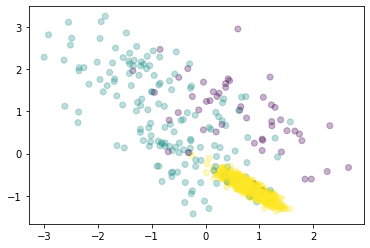

In [74]:
plt.scatter(data[:,0], data[:,1], c=label, alpha=0.3)

In [75]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE()

In [76]:
smoted_data, smoted_label = smote.fit_resample(data,label) 

print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(label).sum()))
print('\nSMOTE 결과 \n{}'.format(pd.get_dummies(smoted_label).sum()))

원본 데이터의 클래스 비율 
0     53
1    154
2    793
dtype: int64

SMOTE 결과 
0    793
1    793
2    793
dtype: int64


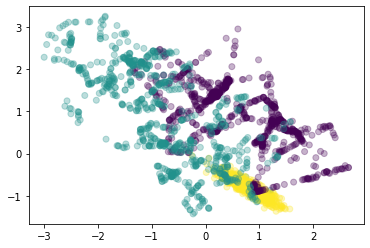

In [78]:
fig = plt.Figure(figsize=(12,6))
plt.scatter(smoted_data[:,0], smoted_data[:,1], c=smoted_label, alpha=0.3) 

### 차원의 축소 

In [79]:
from sklearn.datasets import load_digits 
digits = load_digits() 

In [81]:
print(digits.DESCR) # scikit-learn에서 가져온 데이터에 대한 설명은 다음과 같이 불러옴. 

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [82]:
data = digits.data 
label = digits.target 

In [86]:
data.shape

(1797, 64)

In [89]:
label.shape

(1797,)

1차원으로 들어가 있는 이미지 배열을 8*8배열로 재구성

In [91]:
data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [94]:
label[0]

0

Label: 0


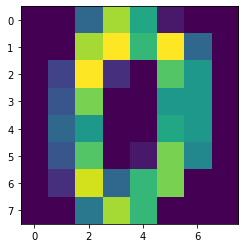

In [97]:
plt.imshow(data[0].reshape((8,8))) # 픽셀 정보를 이미지로 
print('Label: {}'.format(label[0]))

In [99]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

In [100]:
new_data = pca.fit_transform(data) 

In [101]:
print('원본 데이터의 차원 \n{}'.format(data.shape))
print('PCA를 거친 데이터의 차원 \n{}'.format(new_data.shape))

원본 데이터의 차원 
(1797, 64)
PCA를 거친 데이터의 차원 
(1797, 2)


In [102]:
new_data[0]

array([-1.25946443, 21.27488519])

In [103]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [106]:
new_data[:,0]

array([-1.25946443,  7.95761006,  6.99192077, ..., 10.80128899,
       -4.8720993 , -0.34438452])

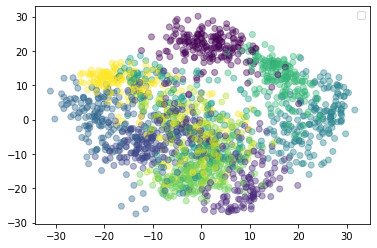

In [110]:
plt.scatter(new_data[:,0], new_data[:,1] , c=label, alpha=0.4) 
plt.legend() 

### Categorical variable to Numeric variable

Label Encoding

In [111]:
data = pd.read_csv(abalone_path, header=None, names=abalone_columns) 
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [112]:
label = data['Sex']

In [113]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

In [114]:
type(label)

pandas.core.series.Series

In [116]:
label.head(5)

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [120]:
label_encoded_label = le.fit_transform(label) 
label_encoded_label[:5]

array([2, 2, 0, 2, 1])

One-hot Encoding  

n개의 범주형 데이터를 n개의 비트 벡터로 표현. 

In [122]:
label.values.shape

(4177,)

In [125]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False) # 기본이 true 

one_hot_encoded = ohe.fit_transform(label.values.reshape((-1,1)))  

In [127]:
one_hot_encoded[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])